In [4]:
import numpy as np
from matplotlib import pyplot as plt
from utils import *
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

Using synthetic dataset

In [5]:
import numpy as np

# Parameters
num_matrices = 1000
matrix_size = (4, 4)

# Generate matrices filled with ones
matrices = np.ones((num_matrices, *matrix_size))

# Create a sine wave function for scaling
# Let's scale the matrices by the sine of indices (0, 1, ..., num_matrices-1)
scaling_factors = np.abs(np.sin(np.linspace(0, 2 * np.pi, num_matrices)))

# Scale each matrix by its corresponding sine value
scaled_matrices = matrices * scaling_factors[:, np.newaxis, np.newaxis]

# Check the shape of the resulting array
print(scaled_matrices.shape)  # Should be (5000, 4, 4)


(1000, 4, 4)


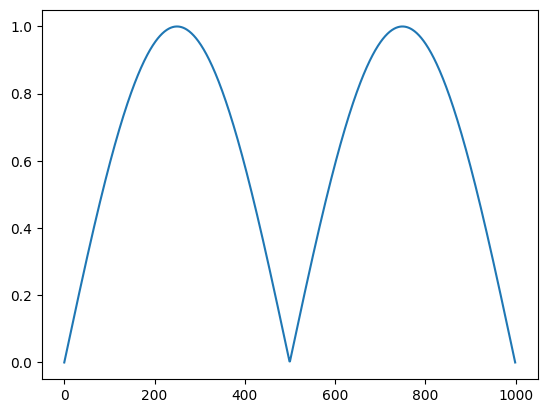

In [6]:
# Plot one od pair
od_pair = scaled_matrices[:, 0, 2]

plt.plot(od_pair)

In [17]:
# Create a toy topology, all link capacities have a value of 5
G = fully_connected_network(num_nodes=4, capacity=1)

# Get ground truth u values 
mlu_ground_truth = np.zeros((num_matrices, ))

for i in range(num_matrices): 
    D = scaled_matrices[300, :, :]
    np.fill_diagonal(D, 0)
    mlu_ground_truth[i] = MinMaxLinkUtil(G, D)

    
# Split ground truth u values into training and testing labels
mlu_train_labels, mlu_test_labels = train_test_split(mlu_ground_truth.reshape(1,-1), 0.8)